Let's analyze and answer business questions about 12 months worth of sales data. The data contains thousands of skateboarding store purchases broken down by month, product type, cost, purchase address, etc. 


To get started, we download the data that is found on 2019_sales_data then we import them into colab files  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


It look's like we have 12 Csv files. We need to Concatenate them together to create a new DataFrame by using pd.concat

In [ ]:
import pandas as pd 
import glob

In [ ]:
#list of files
path ='/content'
months = glob.glob(path + "/*2019.csv")
#combine all files in the list
all_months = pd.concat([pd.read_csv(m) for m in months ])
#export to csv
all_months.to_csv('Sales_2019.csv',index = False)

We now have a csv called 'Sales_2019.csv' that contains all the data. Let's take a look at the first five rows of the updated dataframe

In [ ]:
year = pd.read_csv('Sales_2019.csv')
year.head()

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,0,155009,Element ‑ Visserie Allen 1,1,82.95,10/29/19 16:15,"107 AVN Medina, CasaBlanca 20000, Morroco"
1,1,155010,Grip,1,26.84,10/25/19 18:09,"126 AVN Mohammed VI, Rabat 10000, Morroco"
2,2,155011,Element ‑ Visserie Allen 1,1,82.95,10/08/19 15:26,"65 AVN El Siaghin, Fes 30000, Morroco"
3,3,155012,T-Shirt Colorblock vans,1,189.99,10/05/19 10:36,"183 AVN Ville nouvelle, Essaouira 44000, Morroco"
4,4,155013,Steackers,1,24.99,10/01/19 23:08,"87 AVN Essaada, Fes 30000, Morroco"


# Cleaning the data 

In [ ]:
#We get rid of this unnecessary column 
year.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#How many Nan value we have ? 
year['Order_Date'].isna().value_counts()

False    18707
True        54
Name: Order_Date, dtype: int64

In [ ]:
#Drop NaN values from DataFrame
year.dropna(how='any', inplace=True)

#Adding month column 

We don't have the month currently but we have dates for each of our products that were sold. The easiest solution to add a month column would be to just take the first two characters in the date string

In [ ]:
year['Month'] = year['Order_Date'].str[:2]
year.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,155009,Element ‑ Visserie Allen 1,1,82.95,10/29/19 16:15,"107 AVN Medina, CasaBlanca 20000, Morroco",10
1,155010,Grip,1,26.84,10/25/19 18:09,"126 AVN Mohammed VI, Rabat 10000, Morroco",10
2,155011,Element ‑ Visserie Allen 1,1,82.95,10/08/19 15:26,"65 AVN El Siaghin, Fes 30000, Morroco",10
3,155012,T-Shirt Colorblock vans,1,189.99,10/05/19 10:36,"183 AVN Ville nouvelle, Essaouira 44000, Morroco",10
4,155013,Steackers,1,24.99,10/01/19 23:08,"87 AVN Essaada, Fes 30000, Morroco",10


In [ ]:
year['Month'].value_counts()

12    2980
11    2303
01    1686
05    1632
02    1602
07    1528
09    1403
03    1267
08    1214
10    1160
06    1108
04     787
Or      37
Name: Month, dtype: int64

a month value should probabely be numerical value but it looks like we have an 'Or' value that we have to get rid of  

In [ ]:
year = year[year['Order_Date'].str[:2]!='Or']
year['Month'] = pd.to_numeric(year['Month'])

#Adding sales column

Qantity_ordered time price_each will give us our sales 

In [ ]:
year['Quantity_Ordered'] = pd.to_numeric(year['Quantity_Ordered'])
year['Price_Each'] = pd.to_numeric(year['Price_Each'])
year['Sales']= year['Quantity_Ordered'] * year['Price_Each']
year.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,155009,Element ‑ Visserie Allen 1,1.0,82.95,10/29/19 16:15,"107 AVN Medina, CasaBlanca 20000, Morroco",10,82.95
1,155010,Grip,1.0,26.84,10/25/19 18:09,"126 AVN Mohammed VI, Rabat 10000, Morroco",10,26.84
2,155011,Element ‑ Visserie Allen 1,1.0,82.95,10/08/19 15:26,"65 AVN El Siaghin, Fes 30000, Morroco",10,82.95
3,155012,T-Shirt Colorblock vans,1.0,189.99,10/05/19 10:36,"183 AVN Ville nouvelle, Essaouira 44000, Morroco",10,189.99
4,155013,Steackers,1.0,24.99,10/01/19 23:08,"87 AVN Essaada, Fes 30000, Morroco",10,24.99


#Question1 : what was the best month of sales ? how much was earned that month?

Now that we have successfully added a month column, added a sales column. Let's answer the question what was the best month of sales. We can do this pretty easily with a groupby function and plot the results

In [ ]:
year.groupby(['Month'])['Sales'].sum()

Month
1      614205.45
2      648517.30
3      491766.69
4      306046.03
5      651663.44
6      421395.38
7      620597.84
8      515000.22
9      526127.99
10     461673.46
11     892008.21
12    1155290.43
Name: Sales, dtype: float64

December was the best month of sales with approximately over 100million DHS and then worst month was april with 30million  DHS  

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sales in USD')

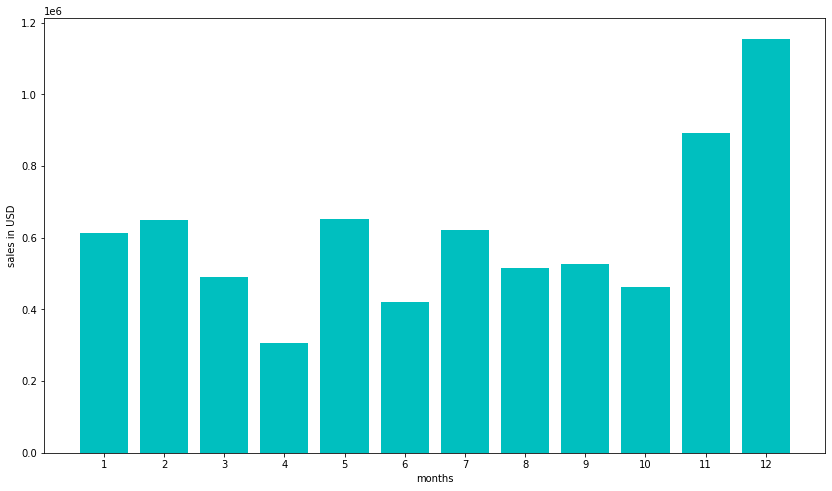

In [ ]:
months = range(1,13)
results = year.groupby(['Month']).sum()
plt.figure(figsize=(14,8))
plt.bar(months, results['Sales'] , color='c')
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('sales in USD')

Why would we do so much better in december and november compared to other months. Did we spent more money in advertising?  We try to look for correlations that probably led to these better results. In the month of december we think about internationnal holidays, all people are buying a lot of gifts for each others so it makes sense that december has the most number of sales.

#Question2 : what city had the highest number of sales ? 


In [ ]:
year.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,155009,Element ‑ Visserie Allen 1,1.0,82.95,10/29/19 16:15,"107 AVN Medina, CasaBlanca 20000, Morroco",10,82.95
1,155010,Grip,1.0,26.84,10/25/19 18:09,"126 AVN Mohammed VI, Rabat 10000, Morroco",10,26.84
2,155011,Element ‑ Visserie Allen 1,1.0,82.95,10/08/19 15:26,"65 AVN El Siaghin, Fes 30000, Morroco",10,82.95
3,155012,T-Shirt Colorblock vans,1.0,189.99,10/05/19 10:36,"183 AVN Ville nouvelle, Essaouira 44000, Morroco",10,189.99
4,155013,Steackers,1.0,24.99,10/01/19 23:08,"87 AVN Essaada, Fes 30000, Morroco",10,24.99


if we look at our data, we do have a purchase address and nested right in the middle is our city name with it's zip so if we want to sum up by city we're going to to have to somehow extract this value and then get rid of the zip 

In [ ]:
# adding city column 
year['City']= year['Purchase_Address'].apply(lambda x: x.split(',')[1])

In [ ]:
year.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,155009,Element ‑ Visserie Allen 1,1.0,82.95,10/29/19 16:15,"107 AVN Medina, CasaBlanca 20000, Morroco",10,82.95,CasaBlanca 20000
1,155010,Grip,1.0,26.84,10/25/19 18:09,"126 AVN Mohammed VI, Rabat 10000, Morroco",10,26.84,Rabat 10000
2,155011,Element ‑ Visserie Allen 1,1.0,82.95,10/08/19 15:26,"65 AVN El Siaghin, Fes 30000, Morroco",10,82.95,Fes 30000
3,155012,T-Shirt Colorblock vans,1.0,189.99,10/05/19 10:36,"183 AVN Ville nouvelle, Essaouira 44000, Morroco",10,189.99,Essaouira 44000
4,155013,Steackers,1.0,24.99,10/01/19 23:08,"87 AVN Essaada, Fes 30000, Morroco",10,24.99,Fes 30000


In [ ]:
year['City']= year['City'].apply(lambda x: x.split(' ')[1])

In [ ]:
year.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,155009,Element ‑ Visserie Allen 1,1.0,82.95,10/29/19 16:15,"107 AVN Medina, CasaBlanca 20000, Morroco",10,82.95,CasaBlanca
1,155010,Grip,1.0,26.84,10/25/19 18:09,"126 AVN Mohammed VI, Rabat 10000, Morroco",10,26.84,Rabat
2,155011,Element ‑ Visserie Allen 1,1.0,82.95,10/08/19 15:26,"65 AVN El Siaghin, Fes 30000, Morroco",10,82.95,Fes
3,155012,T-Shirt Colorblock vans,1.0,189.99,10/05/19 10:36,"183 AVN Ville nouvelle, Essaouira 44000, Morroco",10,189.99,Essaouira
4,155013,Steackers,1.0,24.99,10/01/19 23:08,"87 AVN Essaada, Fes 30000, Morroco",10,24.99,Fes


To answer the question we group by the city column 

In [ ]:
year.groupby('City').sum().sort_values('Sales',ascending = False)

,Quantity_Ordered,Price_Each,Month,Sales
City,,,,
Essaouira,4147.0,1620920.51,28894,1623821.59
Salé,2753.0,1071988.98,19261,1073037.90
CasaBlanca,2782.0,1022869.98,19496,1024926.47
Rabat,2279.0,881544.58,15854,883455.44
Fes,1803.0,682686.97,12650,683970.44
Oujda,1321.0,542116.74,9038,542869.77
Marrakech,1339.0,518553.09,9512,520334.76
Tanger,1317.0,495259.62,9216,495795.65
Tetouan,972.0,371271.30,6896,372787.85


Essaouira apperas to be the best with over 162million DHS. Let's plot the results 

Text(0, 0.5, 'sales in USD')

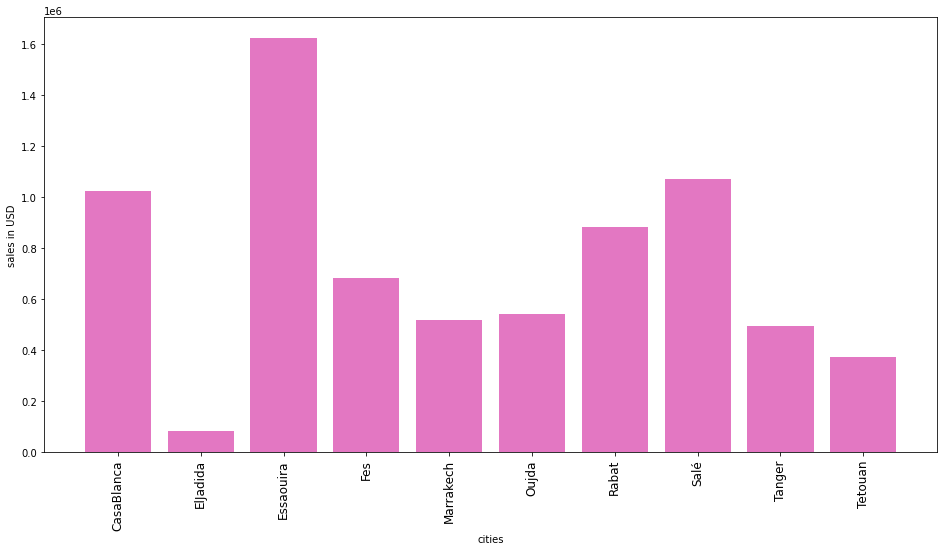

In [ ]:
results = year.groupby(['City']).sum()
plt.figure(figsize=(16,8))
plt.bar(results.index, results['Sales'] , color='C6')
plt.xticks(results.index, rotation='vertical', size=12)
plt.xlabel('cities')
plt.ylabel('sales in USD')

it was expected that the essaouira got the highest number of sales because they have the biggest skateboarding park near to the beach and all extreme sports are popular there 

#Question 3 : What time should we display advertisements to maximize the likelihood of purchases?

if we remember what our data looks like

In [ ]:
year.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,155009,Element ‑ Visserie Allen 1,1.0,82.95,10/29/19 16:15,"107 AVN Medina, CasaBlanca 20000, Morroco",10,82.95,CasaBlanca
1,155010,Grip,1.0,26.84,10/25/19 18:09,"126 AVN Mohammed VI, Rabat 10000, Morroco",10,26.84,Rabat
2,155011,Element ‑ Visserie Allen 1,1.0,82.95,10/08/19 15:26,"65 AVN El Siaghin, Fes 30000, Morroco",10,82.95,Fes
3,155012,T-Shirt Colorblock vans,1.0,189.99,10/05/19 10:36,"183 AVN Ville nouvelle, Essaouira 44000, Morroco",10,189.99,Essaouira
4,155013,Steackers,1.0,24.99,10/01/19 23:08,"87 AVN Essaada, Fes 30000, Morroco",10,24.99,Fes


to answer this question what we're going to really need to look at is the order date. We basically have to figure out a way that we kind of aggregate all of the order dates into their distribution over over a 24-hour period.    

In [ ]:
year['Order_Date']= pd.to_datetime(year['Order_Date']) 

In [ ]:
# importing the datetime library 
import datetime as dt
# adding hour column 
year['Hour'] = year['Order_Date'].dt.hour

Text(0, 0.5, 'number of sales')

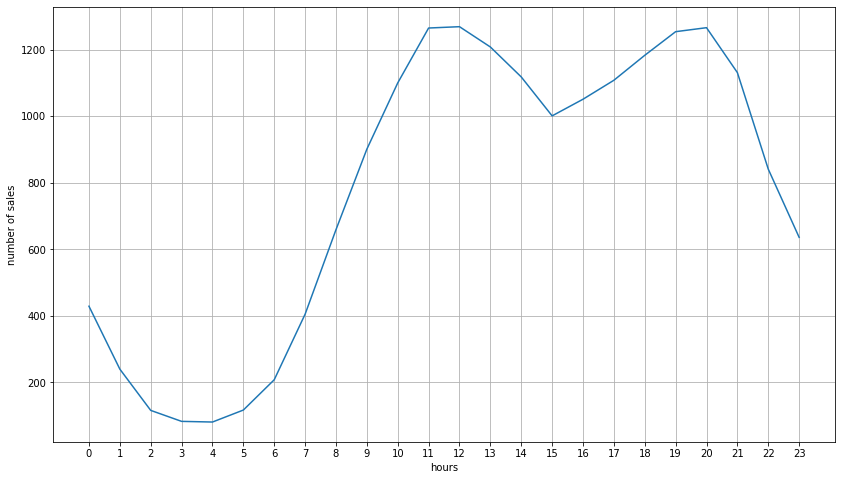

In [ ]:
hours = [hour for hour, df in year.groupby(['Hour'])]
plt.figure(figsize=(14,8))
plt.plot(hours, year.groupby(['Hour'])['Sales'].count())
plt.xticks(hours)
plt.grid()
plt.xlabel('hours')
plt.ylabel('number of sales')

we have peaks at around 11 and another one at around 19 or 20. That's kind of makes. Like early in the day you're doing your chores or like 19 maybe it's after work type of deal. If we have to answer the question, maybe right before 11 is a good time to put an ad or 12. Also 18 and 17 would be a good time to display ads because those were the peaks  of when all the orders in our dataset happened 

# Question 4 : What products are most often sold together?

to introduce the problem, the first thing to note is hw do we know if a product is sold together with another product. Let's have a look at our data another time 

In [ ]:
year.head(15)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
0,155009,Element ‑ Visserie Allen 1,1.0,82.95,2019-10-29 16:15:00,"107 AVN Medina, CasaBlanca 20000, Morroco",10,82.95,CasaBlanca,16
1,155010,Grip,1.0,26.84,2019-10-25 18:09:00,"126 AVN Mohammed VI, Rabat 10000, Morroco",10,26.84,Rabat,18
2,155011,Element ‑ Visserie Allen 1,1.0,82.95,2019-10-08 15:26:00,"65 AVN El Siaghin, Fes 30000, Morroco",10,82.95,Fes,15
3,155012,T-Shirt Colorblock vans,1.0,189.99,2019-10-05 10:36:00,"183 AVN Ville nouvelle, Essaouira 44000, Morroco",10,189.99,Essaouira,10
4,155013,Steackers,1.0,24.99,2019-10-01 23:08:00,"87 AVN Essaada, Fes 30000, Morroco",10,24.99,Fes,23
5,155014,All In One Skate,1.0,88.95,2019-10-10 15:12:00,"126 AVN Mohammed VI, Rabat 10000, Morroco",10,88.95,Rabat,15
6,155015,Nike Nyjah 2,1.0,758.99,2019-10-12 09:26:00,"34 AVN Hassan II, Marrakech 40000, Morroco",10,758.99,Marrakech,9
7,155016,Element ‑ Visserie Allen 1,1.0,82.95,2019-10-03 00:53:00,"12 AVN Ville nouvelle, Essaouira 44000, Morroco",10,82.95,Essaouira,0
8,155017,Steackers,1.0,24.99,2019-10-09 13:41:00,"146 AVN Ville nouvelle, Fes 30000, Morroco",10,24.99,Fes,13
9,155018,Element Complete Board,1.0,1200.00,2019-10-31 15:46:00,"55 AVN Essaada, Rabat 10000, Morroco",10,1200.00,Rabat,15


if we look at thi sorder_id values, if they have the same order_id that means that Element Complete Board and Element ‑ Visserie Allen 1 were ordered together they also are delivered to the same address at the same time. So basically we're trying to figure out counting all of the duplicate order ids which products were sold together the most    

here is a look at the different products

In [ ]:
year['Product'].unique()

array(['Element ‑ Visserie Allen 1', 'Grip', 'T-Shirt Colorblock vans',
       'Steackers', 'All In One Skate', 'Nike Nyjah 2',
       'Element Complete Board', 'Nike Jacob Janowski', 'Flat Bar',
       '55mm Sparx 99a Ricta Wheels', 'Supreme Cap',
       'Flip Complete Board', 'Trasher hoodie',
       'Black Standard Bullet Trucks',
       'Mercer Flora Untamed 35" Longboard',
       'Polished Silver Standard Bullet Trucks',
       'Element by Nigel Cabourn Alder 4 Jacket', 'Oliveira Tin Toy Deck',
       'Santa Cruz Classic Dot 41" Drop Through Longboard'], dtype=object)

In [ ]:
# creating a new df that contains duplicates only 
year_duplicates= year[year['Order_ID'].duplicated(keep=False)]

In [ ]:
year_duplicates.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
9,155018,Element Complete Board,1.0,1200.00,2019-10-31 15:46:00,"55 AVN Essaada, Rabat 10000, Morroco",10,1200.00,Rabat,15
10,155018,Element ‑ Visserie Allen 1,1.0,82.95,2019-10-31 15:46:00,"55 AVN Essaada, Rabat 10000, Morroco",10,82.95,Rabat,15
13,155021,Nike Jacob Janowski,1.0,778.99,2019-10-09 09:49:00,"184 AVN Ennasr, Oujda 60000, Morroco",10,778.99,Oujda,9
14,155021,Steackers,1.0,24.99,2019-10-09 09:49:00,"184 AVN Ennasr, Oujda 60000, Morroco",10,24.99,Oujda,9
20,155027,T-Shirt Colorblock vans,1.0,189.99,2019-10-25 01:50:00,"84 AVN Elfarah, Rabat 10000, Morroco",10,189.99,Rabat,1


we use transform() method to join values from two rows into a single one  

In [ ]:
year_duplicates['Grouped'] = year_duplicates.groupby('Order_ID')['Product'].transform(lambda x : ','.join(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
year_duplicates.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Grouped
9,155018,Element Complete Board,1.0,1200.00,2019-10-31 15:46:00,"55 AVN Essaada, Rabat 10000, Morroco",10,1200.00,Rabat,15,"Element Complete Board,Element ‑ Visserie Allen 1"
10,155018,Element ‑ Visserie Allen 1,1.0,82.95,2019-10-31 15:46:00,"55 AVN Essaada, Rabat 10000, Morroco",10,82.95,Rabat,15,"Element Complete Board,Element ‑ Visserie Allen 1"
13,155021,Nike Jacob Janowski,1.0,778.99,2019-10-09 09:49:00,"184 AVN Ennasr, Oujda 60000, Morroco",10,778.99,Oujda,9,"Nike Jacob Janowski,Steackers"
14,155021,Steackers,1.0,24.99,2019-10-09 09:49:00,"184 AVN Ennasr, Oujda 60000, Morroco",10,24.99,Oujda,9,"Nike Jacob Janowski,Steackers"
20,155027,T-Shirt Colorblock vans,1.0,189.99,2019-10-25 01:50:00,"84 AVN Elfarah, Rabat 10000, Morroco",10,189.99,Rabat,1,"T-Shirt Colorblock vans,Supreme Cap"


it looks like we get what we wanted in the grouped column. Now let's get rid of the duplicates 

In [ ]:
year_duplicates = year_duplicates[['Order_ID','Grouped']].drop_duplicates()

In [ ]:
year_duplicates.head()

,Order_ID,Grouped
9,155018,"Element Complete Board,Element ‑ Visserie Allen 1"
13,155021,"Nike Jacob Janowski,Steackers"
20,155027,"T-Shirt Colorblock vans,Supreme Cap"
197,155203,"Grip,Grip"
225,155230,"T-Shirt Colorblock vans,Flip Complete Board"


now we need to count the pairs of what occurs together most frequently. We're going to use a couple new libraries

In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()
for row in year_duplicates['Grouped']:
  row_list= row.split(',')
  count.update(Counter(combinations(row_list, 2)))

In [ ]:
# get the first 10 
for key,value in count.most_common(10):
  print(key,value)

('Flip Complete Board', 'All In One Skate') 98
('Element Complete Board', 'Element ‑ Visserie Allen 1') 92
('Flip Complete Board', 'Supreme Cap') 49
('Element Complete Board', 'Supreme Cap') 40
('Flip Complete Board', 'Black Standard Bullet Trucks') 34
('Oliveira Tin Toy Deck', 'Element ‑ Visserie Allen 1') 30
('Element Complete Board', 'T-Shirt Colorblock vans') 21
('Element ‑ Visserie Allen 1', 'Supreme Cap') 15
('Oliveira Tin Toy Deck', 'Supreme Cap') 12
('All In One Skate', 'Black Standard Bullet Trucks') 10


Flip Complete Board and All In One Skate were the most commonly items ordered together. Element Complete Board and Element ‑ Visserie Allen 1 too. So what would we do with this. Maybe tryin g to be smart with promotions that we're offering if were selling a complete board try to offer a smart deal. People already want to buy an extra cap or All In One Skate

# Question 5 : what product sold the most? why do you think it sold the most?

In [ ]:
# grouping the products by quantity ordered
grp_quantity = year.groupby('Product')['Quantity_Ordered'].sum()
grp_quantity

Product
55mm Sparx 99a Ricta Wheels                           381.0
All In One Skate                                     2195.0
Black Standard Bullet Trucks                         1543.0
Element Complete Board                                534.0
Element by Nigel Cabourn Alder 4 Jacket               492.0
Element ‑ Visserie Allen 1                           2217.0
Flat Bar                                              401.0
Flip Complete Board                                   694.0
Grip                                                 2176.0
Mercer Flora Untamed 35" Longboard                     68.0
Nike Jacob Janowski                                   643.0
Nike Nyjah 2                                          641.0
Oliveira Tin Toy Deck                                 182.0
Polished Silver Standard Bullet Trucks                768.0
Santa Cruz Classic Dot 41" Drop Through Longboard      59.0
Steackers                                            2198.0
Supreme Cap                     

In [ ]:
# grouping the products by sales
grp_sales = year.groupby('Product')['Sales'].sum()
grp_sales

Product
55mm Sparx 99a Ricta Wheels                            83816.19
All In One Skate                                      195245.25
Black Standard Bullet Trucks                          462900.00
Element Complete Board                                640800.00
Element by Nigel Cabourn Alder 4 Jacket              1672800.00
Element ‑ Visserie Allen 1                            183900.15
Flat Bar                                              761895.99
Flip Complete Board                                   971600.00
Grip                                                   58403.84
Mercer Flora Untamed 35" Longboard                     81600.00
Nike Jacob Janowski                                   500890.57
Nike Nyjah 2                                          486512.59
Oliveira Tin Toy Deck                                 145600.00
Polished Silver Standard Bullet Trucks                230392.32
Santa Cruz Classic Dot 41" Drop Through Longboard      70800.00
Steackers                       

In [ ]:
pd.concat([grp_quantity, grp_sales], axis=1)

,Quantity_Ordered,Sales
Product,,
55mm Sparx 99a Ricta Wheels,381.0,83816.19
All In One Skate,2195.0,195245.25
Black Standard Bullet Trucks,1543.0,462900.00
Element Complete Board,534.0,640800.00
Element by Nigel Cabourn Alder 4 Jacket,492.0,1672800.00
Element ‑ Visserie Allen 1,2217.0,183900.15
Flat Bar,401.0,761895.99
Flip Complete Board,694.0,971600.00
Grip,2176.0,58403.84


Text(0, 0.5, 'quantaty ordered')

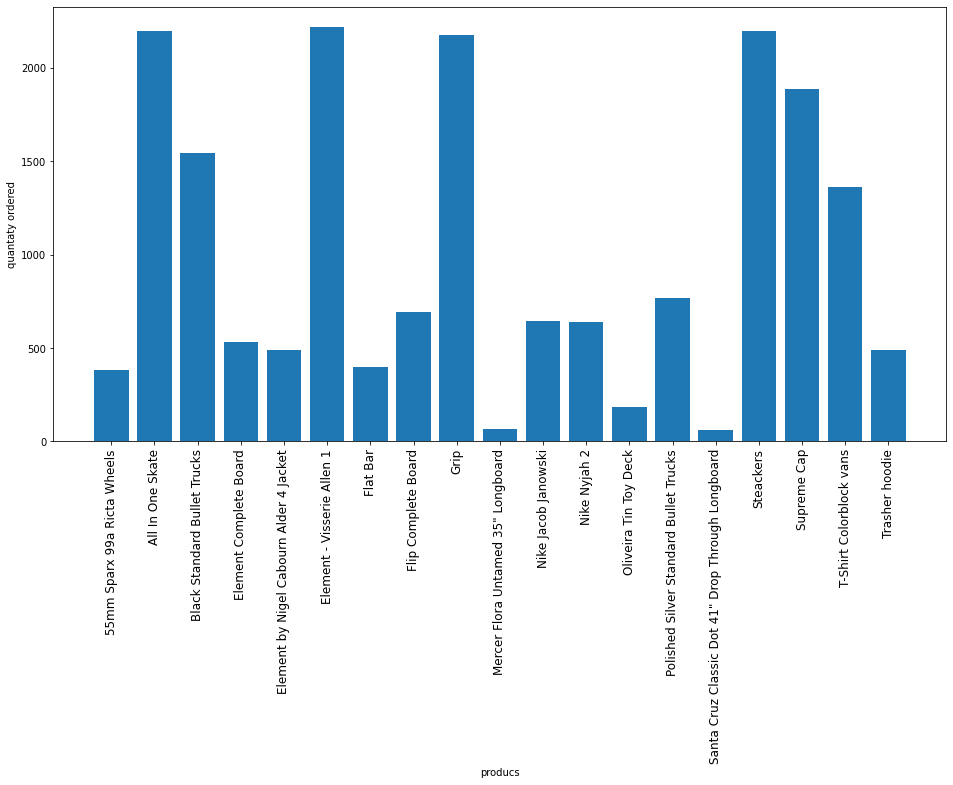

In [ ]:
orders = grp_quantity
plt.figure(figsize=(16,8))
plt.bar(grp_quantity.index, grp_quantity )
plt.xticks(grp_quantity.index, rotation='vertical', size=12)
plt.xlabel('producs')
plt.ylabel('quantaty ordered')

the items that were sold the most are the cheap like all in one skate and grip. Longboard is not cheap so that's probably the reason they are a lot higher the longboard or other expensive items. Let's try to prove that by overlaying the graph with maybe the actual prices of these items and see if there is like kind of direct correlation.

In [ ]:
grp_prices=year.groupby('Product')['Price_Each'].mean()
grp_prices

Product
55mm Sparx 99a Ricta Wheels                           219.99
All In One Skate                                       88.95
Black Standard Bullet Trucks                          300.00
Element Complete Board                               1200.00
Element by Nigel Cabourn Alder 4 Jacket              3400.00
Element ‑ Visserie Allen 1                             82.95
Flat Bar                                             1899.99
Flip Complete Board                                  1400.00
Grip                                                   26.84
Mercer Flora Untamed 35" Longboard                   1200.00
Nike Jacob Janowski                                   778.99
Nike Nyjah 2                                          758.99
Oliveira Tin Toy Deck                                 800.00
Polished Silver Standard Bullet Trucks                299.99
Santa Cruz Classic Dot 41" Drop Through Longboard    1200.00
Steackers                                              24.99
Supreme Cap     

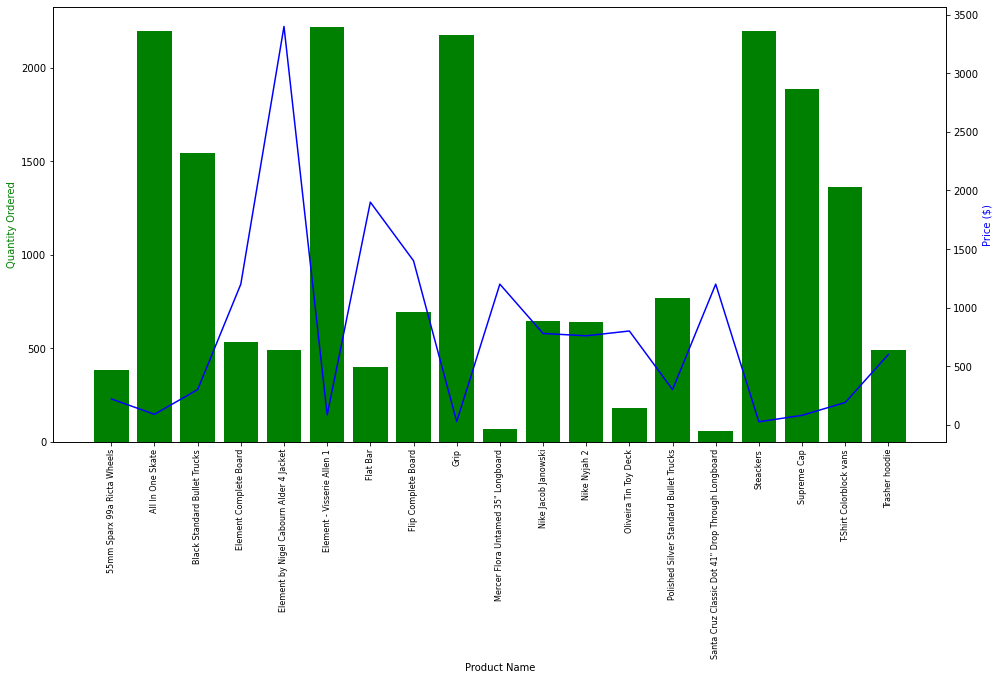

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))

ax2 = ax1.twinx()
ax1.bar(grp_quantity.index, grp_quantity, color='g')
ax2.plot(grp_quantity.index, grp_prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(grp_quantity.index, rotation='vertical', size=8)

fig.show()

in  blue we have the price and in the green we have quantaty ordered. Whenever the quantity ordered is high the price is low. And then we look at some inconsistencies like teh price is very high for element complete board, why is the quantity ordered higher than longboard. We guess that most people prefer skating a simple board than an overboard that's wy they are lookin to buy simple boards more 